In [1]:
import numpy as np
from DIG import DIG
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy as sci
from scipy import io
import phate
import scanpy as sc
import scprep as scp
from mpl_toolkits.mplot3d import Axes3D
from DPT import DPT
from sklearn import datasets
import graphtools

C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\anndata\core\anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


## DIG EB data

In [2]:
## Import the data
datafull = io.loadmat('eb_dpt.mat')
# data pca is the EB preprocessed by pca with 10 dimensions
data_pca = datafull['data_pc']
# dpt = datafull['dpteb']
labels = datafull['labels']

## Compute DPT

In [4]:
dpt_c = DPT()
dpt = dpt_c.compute_dpt(data_pca)

C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:115: RuntimeWarning: Cannot perform PCA to 10 dimensions on data with min(n_samples, n_features) = 10
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


In [5]:
# order the data by they dpt distance
dpt_or = np.argsort(dpt.dpt, axis=0)

In [6]:
# Histograms distance
dig = DIG(dpt = dpt_or, n_bins = 10, L1 = 1000, L2 = 10, L3=10)
hist = dig.compute_hist_distances(data_pca)

In [7]:
# Compute phate with histograms distance
phate_emb = phate.PHATE(knn_dist='precomputed_distance', knn = 20)
phate_fit = phate_emb.fit_transform(hist.histogram_distances)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1583 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 0.33 seconds.
  Calculated graph and diffusion operator in 0.41 seconds.
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 1.29 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.56 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 275.94 seconds.
Calculated PHATE in 278.24 seconds.


In [8]:
cells = labels[hist.centers_histograms].flatten()
cells = cells.astype(int)
cmap = cm.get_cmap('jet', 5) 

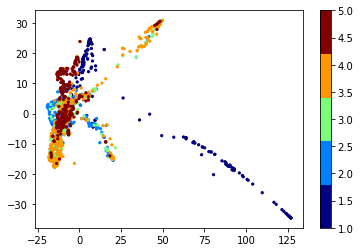

In [9]:
plt.scatter(phate_fit[:,0], phate_fit[:,1], 5, c = cells, cmap = cmap)
cbar= plt.colorbar()

## Different values for L1 and L2

In [12]:
L1_values = [1000, 2500]   
L2_values = [20, 50]   
emb = []
for L1 in L1_values:   
    for L2 in L2_values:
        dig = DIG(dpt = dpt_or, n_bins = 10, L1 = L1, L2 = L2, L3 = 10)
        hist = dig.compute_hist_distances(data_pca)
        phate_emb = phate.PHATE(knn_dist='precomputed_distance', knn = 20, t = 20)
        phate_fit = phate_emb.fit_transform(hist.histogram_distances)
        title = "L1 = "+str(L1) + "L3 = "+str(L2)
        embedding = [phate_fit, hist.centers_histograms, title]
        emb.append(embedding)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1583 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 0.37 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.42 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 97.49 seconds.
Calculated PHATE in 98.31 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1583 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 0.33 seconds.
  Calculated graph and diffusion operator in 0.40 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.44 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 23.72 seconds.
Calculated PHATE in 24.60 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1433 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 0.37 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.35 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 51.02 seconds.
Calculated PHATE in 51.76 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1433 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 0.29 seconds.
  Calculated graph and diffusion operator in 0.35 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.36 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.15 seconds.
Calculated PHATE in 5.89 seconds.


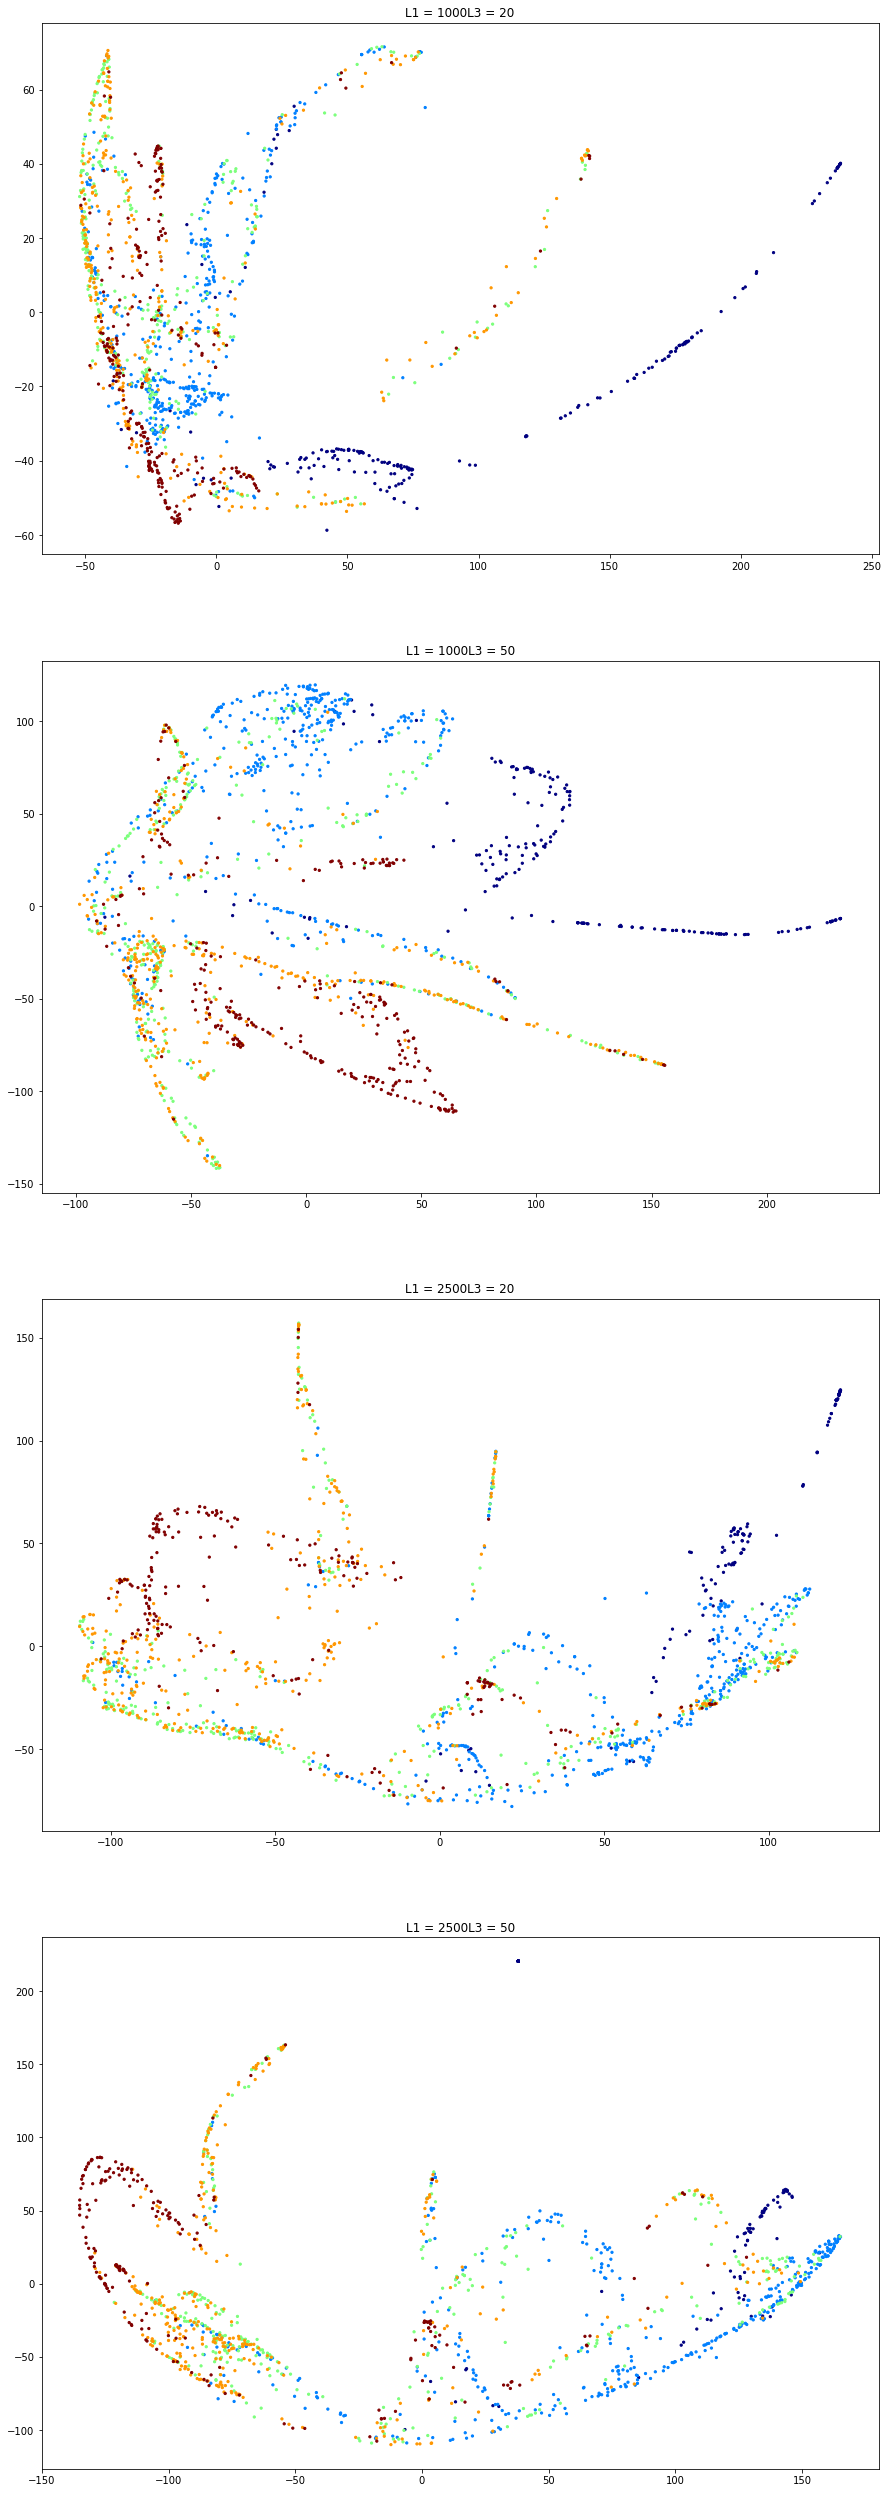

In [13]:
fig, axs = plt.subplots(len(emb),1, figsize=(15,45))
for i in range(len(emb)):
    cells = labels[emb[i][1]].flatten()
    axs[i].scatter(emb[i][0][:,0],emb[i][0][:,1], 5, c = cells, cmap = cmap)
    axs[i].set_title(emb[i][2])

## Euclidean distances

In [14]:
dig = DIG(dpt = dpt_or, n_bins = 10, L1 = 500, histograms_distance='euclidean')
hist = dig.compute_hist_distances(data_pca)
phate_emb = phate.PHATE(knn_dist='precomputed_distance', knn = 20)
phate_fit = phate_emb.fit_transform(hist.histogram_distances)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 3265 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 1.10 seconds.
  Calculated graph and diffusion operator in 1.43 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.68 seconds.
    Calculating KMeans...
    Calculated KMeans in 21.14 seconds.
  Calculated landmark operator in 22.34 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 2.65 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.12 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 82.22 seconds.
Calculated PHATE in 109.79 seconds.


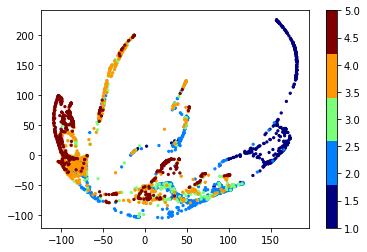

In [15]:
cells = labels[hist.centers_histograms].flatten()
plt.scatter(phate_fit[:,0], phate_fit[:,1], 5, c = cells, cmap = cmap)
cbar= plt.colorbar()